# Objective of this notebook:
1. Explain Notebook
2. Serve as stepping stone to allow function to be reproduced across TS Pred Domains

### Competition Explanation
1. Leaderboard score: 6476
2. Notebook Score: 9766, which served as baseline and building block to notebook of score: 11,480
3. Notebook Credit: https://www.kaggle.com/code/tarlannazarov/own-jane-street-with-keras-nn/notebook

### To Return to :
- f_mean = np.mean(train[features[1:]].values,axis=0) #Original, author did not use features_0, used only features_1,features_2,features_3,features_4
- f_mean = np.mean(train[features].values,axis=0) # preferred

### Competition Calculation

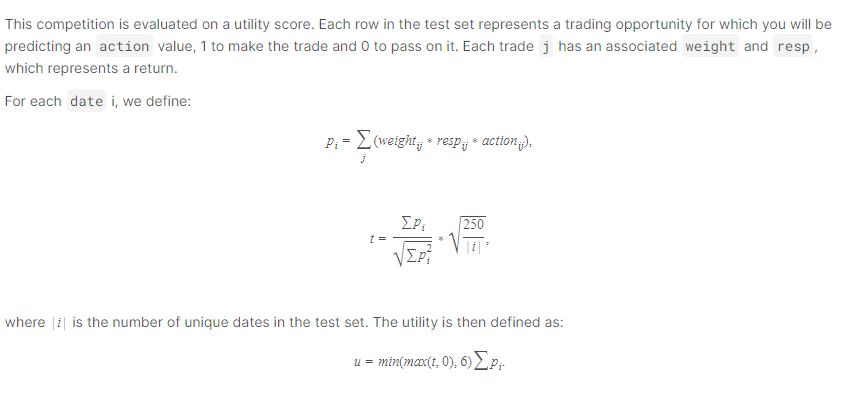

### Competition Data 

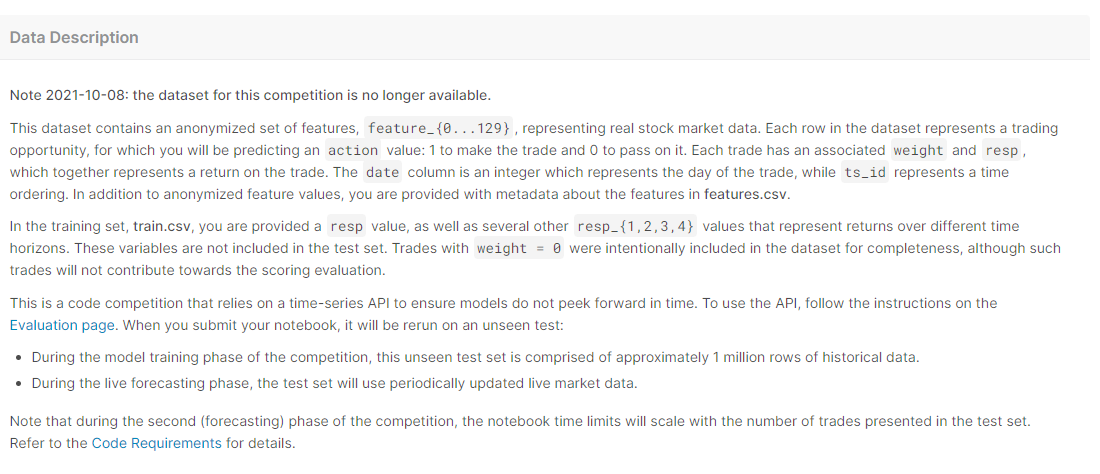

In [6]:
# Print Tensorflow, Keras, Numpy version to make version clear to prevent dependecy issues
# import tensorflow
# import keras
import numpy 
# print(tensorflow.__version__)
# print(keras.__version__)
print(numpy.__version__)

1.21.5


In [9]:
# from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Concatenate, Lambda, GaussianNoise, Activation
# from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras.losses import BinaryCrossentropy
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.layers.experimental.preprocessing import Normalization
# import tensorflow as tf
# import numpy as np
# import pandas as pd
# from tqdm import tqdm
# from random import choices

# SEED = 1111

# tf.random.set_seed(SEED)
# np.random.seed(SEED)

# train = pd.read_csv('../input/jane-street-market-prediction/train.csv')
# train = pd.read_csv('../input/synthetic-jane-street-dataset/train.csv',engine='python')
import numpy as np
import pandas as pd
train_orig = pd.read_csv('../../../git_datasets/Jane Street Data/Splitted_Data/JaneStreet_Part0.csv',index_col = 0)
train_orig
train = train_orig.copy()

In [10]:
df = train[:100]
df
from sklearn.model_selection import train_test_split
train1, test1 = train_test_split(df, test_size=0.2, shuffle=False)
train1
test1

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
80,0,0.000000,0.002130,-0.002745,-0.008444,-0.015764,-0.011037,-1,0.192168,0.509030,...,2.075797,0.316534,-0.523137,2.287031,-1.410027,3.824393,-0.579738,-0.437642,4.400954,151224
81,0,0.000000,0.002715,0.007038,0.013251,0.033339,0.030805,-1,5.069989,-0.677534,...,1.680778,-1.420894,1.481689,1.484181,2.257024,1.385016,-0.622498,2.015994,-0.660342,241819
82,0,0.136471,0.000132,-0.001776,-0.006885,-0.013284,-0.011386,1,-1.077533,0.585472,...,-0.997007,-0.418591,-0.493940,-0.410451,2.311596,-0.689562,-0.144176,9.118039,1.986529,794617
83,0,6.184451,0.000323,0.000038,0.005297,0.017664,0.012203,-1,2.675735,-1.010796,...,-1.666787,-1.005135,0.622079,-1.405905,2.382727,4.911332,4.486974,2.596046,1.406864,418470
84,0,14.751315,-0.000053,-0.000409,0.000062,-0.000847,-0.001730,-1,0.235035,0.293032,...,0.132950,-0.936932,1.957284,2.780663,-0.450810,0.068798,-0.165048,-2.024229,-1.065469,2238446
85,0,6.035338,0.000465,-0.012146,-0.030123,-0.061371,-0.044173,1,1.683748,4.012996,...,-1.700336,-0.090296,0.871598,0.590242,0.341843,-0.817910,0.134225,-1.958204,1.119189,101966
86,0,1.021422,-0.004331,-0.008633,-0.014902,-0.023148,-0.019963,-1,-2.564086,-1.541254,...,-2.826074,-1.521256,0.267695,0.489732,-0.656470,0.813733,6.857226,0.842223,0.030473,326735
87,0,0.000000,0.015465,0.020268,-0.022341,-0.123577,-0.056712,-1,-1.565234,-3.093182,...,-2.544170,1.918875,2.372363,0.215019,-1.067252,-1.384338,0.585646,0.264857,0.919119,529991
88,0,0.160168,-0.000444,-0.000444,-0.002087,-0.007303,-0.004358,1,-0.692626,0.472013,...,-0.374009,-1.282290,-0.321496,2.632548,-0.211243,-0.264565,-0.645231,0.316419,-0.525021,176275
89,0,0.664584,0.000690,-0.005365,-0.012790,-0.024833,-0.024041,-1,2.741720,-1.746618,...,1.541669,2.943086,-1.720535,-0.809167,-2.065582,5.833047,-1.480715,-0.666014,0.647923,1819474


### Observe Data

In [11]:
train

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.049202,0.002514,0.004059,0.015541,0.024346,0.017530,1,-2.541864,0.457145,...,-1.396750,-1.740766,0.984241,1.055600,-0.079467,-2.650392,-1.981605,1.783659,2.866631,87701
1,0,0.180770,-0.000232,0.000292,0.001638,0.002670,0.000906,1,1.435043,-0.801688,...,2.363126,3.088412,-0.680165,-1.452415,-0.482993,0.021540,0.460060,3.930716,-1.233066,131161
2,0,0.807942,0.000639,0.001136,0.002258,0.000157,-0.000691,1,-1.615491,3.070859,...,1.650663,4.536699,-2.317647,0.789400,0.455739,1.509873,-0.890321,-0.652885,1.805953,1964156
3,0,0.000000,0.003162,0.002086,-0.002512,-0.014387,-0.008368,-1,-3.172026,1.501052,...,-0.743715,0.153879,0.180128,-0.653379,0.809250,-3.604416,-1.060510,4.761398,2.454472,1360299
4,0,0.217674,-0.000255,-0.000340,0.001560,0.004779,0.003217,-1,-3.172026,-0.515529,...,-0.277117,1.552482,-0.348023,-0.944887,3.885566,1.968201,-1.015298,0.642338,0.242971,1024723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194617,41,9.499657,-0.000010,-0.000433,-0.002241,-0.003893,-0.000241,-1,2.338139,-1.390194,...,-0.667969,1.654635,-3.354002,-1.561084,-0.021235,0.304516,0.578562,2.351930,-1.043938,2245831
194618,41,0.880071,-0.009220,-0.010878,-0.016373,-0.005701,-0.004407,-1,3.033749,-1.119539,...,-0.142546,-0.441910,2.025904,1.111816,-0.007807,-0.383317,-0.112840,-0.702947,-0.997980,1805522
194619,41,0.000000,0.005172,0.004708,0.009887,0.013415,0.008206,1,4.933404,0.358317,...,0.265527,0.414859,-0.555553,1.416021,0.502948,-1.193979,-1.451042,1.141000,-1.156276,1742984
194620,41,0.078104,-0.001270,-0.001045,0.006422,0.016154,0.010319,1,2.024954,-0.685283,...,0.665552,0.218148,0.648862,-1.365715,0.255495,0.601280,3.224246,-0.650631,-1.370604,887604


#### Features
Note: This will be ur ft. column to parse in global function

In [12]:
[c for c in train.columns.to_list() if 'feature' in c]

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_66',
 'fea

#### non-features 

In [13]:
[c for c in train.columns.to_list() if 'feature' not in c]

['date', 'weight', 'resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp', 'ts_id']

In [14]:
train['resp']

0         0.017530
1         0.000906
2        -0.000691
3        -0.008368
4         0.003217
            ...   
194617   -0.000241
194618   -0.004407
194619    0.008206
194620    0.010319
194621    0.000053
Name: resp, Length: 194622, dtype: float64

In [15]:
train['weight']

0         0.049202
1         0.180770
2         0.807942
3         0.000000
4         0.217674
            ...   
194617    9.499657
194618    0.880071
194619    0.000000
194620    0.078104
194621    1.821867
Name: weight, Length: 194622, dtype: float64

In [16]:
train.columns.to_list()

['date',
 'weight',
 'resp_1',
 'resp_2',
 'resp_3',
 'resp_4',
 'resp',
 'feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'featu

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_66',
 'fea

In [20]:
train = train_orig.copy()

train = train.query('date > 5').reset_index(drop = True) # Param: Get Day 5 and Above
train = train[train['weight'] != 0] # Param: Leave Out for function
train.fillna(train.mean(),inplace=True) 
train['action'] = ((train['resp'].values) > 0).astype(int)
train['action']
features = [c for c in train.columns if "feature" in c]
f_mean = np.mean(train[features[1:]].values,axis=0)# Contemplate: Ignore feature_0, which i think should include
resp_cols = ['resp_1', 'resp_2', 'resp_3', 'resp', 'resp_4'] #should be things like Forward PE, Foward PEG, Foward etc...

X_train = train.loc[:, train.columns.str.contains('feature')] #Train your features
###y_train = (train.loc[:, 'action'])

y_train = np.stack([(train[c] > 0).astype('int') for c in resp_cols]).T # If float > 0, return 1 else 0
y_train

C:\Users\malco\AppData\Local\Temp\ipykernel_25500\2008866231.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['action'] = ((train['resp'].values) > 0).astype(int)


array([[1, 0, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       ...,
       [0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0]])

In [23]:
train[features[1:]].values
features

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_66',
 'fea

In [24]:
y_train = np.stack([(train[c] > 0).astype('int') for c in resp_cols]).T
y_train = [(train[c] > 0).astype('int') for c in resp_cols][:5]
[type((train[c] > 0)) for c in resp_cols][:5]
# y_train
# resp_cols
# num = True

[pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series]

### Observe X_train

In [68]:
X_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129
0,1,-3.172026,4.434892,-0.451238,-1.849861,-0.682616,1.602899,-3.193134,-0.196478,0.279296,...,6.272231,0.004507,0.641876,0.795410,0.337828,1.292695,6.078467,-2.141768,-3.630178,4.806393
1,-1,-1.862270,-1.310441,-0.120067,-0.951030,0.790109,-3.213011,-0.297294,-0.306040,2.040405,...,0.129041,1.024057,-0.814259,2.306749,4.012111,0.043977,-2.754400,-2.217010,-1.578796,0.741731
2,1,0.285112,-1.931258,-0.527158,0.391039,0.228378,-0.584746,0.055840,0.028849,-2.657327,...,-0.530317,1.192040,5.145386,-0.311186,0.262822,2.664963,1.783466,-0.820957,1.262784,-0.615489
3,-1,0.217926,1.350772,-1.050709,0.824696,0.792076,1.209646,-1.122439,-1.896798,2.078037,...,0.284416,2.829786,-0.399924,1.578563,-0.193868,-1.338982,2.696016,-3.583999,2.477546,-0.361818
5,-1,1.418044,-0.696057,0.807482,-0.226004,1.042289,0.321658,0.805796,0.028849,0.644684,...,-0.653244,2.383049,1.355057,1.659399,0.554493,0.424183,-1.588647,1.661917,-1.742249,0.360720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168254,1,0.895137,3.992335,0.578599,0.595967,-1.426580,-0.573949,-1.046361,0.591409,-0.824019,...,0.796242,-1.021545,1.453422,1.772596,-0.060673,5.001509,-0.784987,1.476904,0.847102,-1.697419
168255,-1,2.338139,-1.390194,0.157713,-0.682315,-0.577857,-0.576563,0.055840,0.028849,3.144368,...,1.550577,-0.667969,1.654635,-3.354002,-1.561084,-0.021235,0.304516,0.578562,2.351930,-1.043938
168256,-1,3.033749,-1.119539,1.173057,-1.282766,3.112720,-1.247117,0.055840,1.504742,0.162172,...,2.360911,-0.142546,-0.441910,2.025904,1.111816,-0.007807,-0.383317,-0.112840,-0.702947,-0.997980
168258,1,2.024954,-0.685283,-0.372243,0.441286,-4.311114,-0.249854,0.275261,1.701630,-0.980030,...,-0.360570,0.665552,0.218148,0.648862,-1.365715,0.255495,0.601280,3.224246,-0.650631,-1.370604


### Observe y_train

In [69]:
y_train

array([[1, 0, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       ...,
       [0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0]])

In [67]:


def create_mlp(
    num_columns, num_labels, hidden_units, dropout_rates, label_smoothing, learning_rate
):

    inp = tf.keras.layers.Input(shape=(num_columns,))
    x = tf.keras.layers.BatchNormalization()(inp)
    x = tf.keras.layers.Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = tf.keras.layers.Dense(hidden_units[i])(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation(tf.keras.activations.swish)(x)
        x = tf.keras.layers.Dropout(dropout_rates[i + 1])(x)

    x = tf.keras.layers.Dense(num_labels)(x)
    out = tf.keras.layers.Activation("sigmoid")(x)

    model = tf.keras.models.Model(inputs=inp, outputs=out)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=label_smoothing),
        metrics=tf.keras.metrics.AUC(name="AUC"),
    )

    return model


batch_size = 5000
hidden_units = [150, 150, 150]
dropout_rates = [0.2, 0.2, 0.2, 0.2]
label_smoothing = 1e-2
learning_rate = 1e-3

clf = create_mlp(
    len(features), 5, hidden_units, dropout_rates, label_smoothing, learning_rate
    )

clf.fit(X_train, y_train, epochs=10, batch_size=5000)


models = []

models.append(clf)

th = 0.5000


# f = np.median
# models = models[-3:]
# import janestreet
# env = janestreet.make_env()
# for (test_df, pred_df) in tqdm(env.iter_test()):
#     if test_df['weight'].item() > 0:
#         x_tt = test_df.loc[:, features].values
#         if np.isnan(x_tt[:, 1:].sum()):
#             x_tt[:, 1:] = np.nan_to_num(x_tt[:, 1:]) + np.isnan(x_tt[:, 1:]) * f_mean
#         pred = np.mean([model(x_tt, training = False).numpy() for model in models],axis=0)
#         pred = f(pred)
#         pred_df.action = np.where(pred >= th, 1, 0).astype(int)
#     else:
#         pred_df.action = 0
#     env.predict(pred_df)

Epoch 1/10
28/28 [==============================] - 3s 82ms/step - loss: 0.7370 - AUC: 0.4997
Epoch 2/10
28/28 [==============================] - 2s 81ms/step - loss: 0.7115 - AUC: 0.5025
Epoch 3/10
28/28 [==============================] - 2s 81ms/step - loss: 0.7041 - AUC: 0.5032
Epoch 4/10
28/28 [==============================] - 2s 81ms/step - loss: 0.7001 - AUC: 0.5046
Epoch 5/10
28/28 [==============================] - 2s 81ms/step - loss: 0.6976 - AUC: 0.5059
Epoch 6/10
28/28 [==============================] - 2s 82ms/step - loss: 0.6961 - AUC: 0.5083
Epoch 7/10
28/28 [==============================] - 2s 82ms/step - loss: 0.6954 - AUC: 0.5070
Epoch 8/10
28/28 [==============================] - 2s 81ms/step - loss: 0.6948 - AUC: 0.5083
Epoch 9/10
28/28 [==============================] - 2s 81ms/step - loss: 0.6945 - AUC: 0.5071
Epoch 10/10
28/28 [==============================] - 2s 82ms/step - loss: 0.6940 - AUC: 0.5091
